In [11]:
import matplotlib.pyplot as plt
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import matplotlib
from matplotlib.colors import ListedColormap

In [12]:
def TQ(m,mu,lmbda):
    T = np.ceil(mu*m)
    Q = T-np.ceil(lmbda*T)+1
    return T,Q

In [13]:
mu = 0.272
lmbda = 0.94

m = 12

T, Q = TQ(m,mu,lmbda)

In [14]:
z3s = np.arange(0,m+1, dtype = "int32")
z1s = np.arange(0,m+1, dtype = "int32")

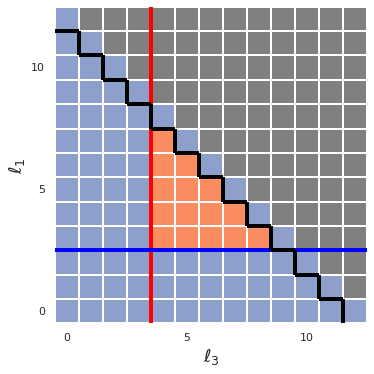

In [15]:
#set general plot parameters
plt.rcParams['font.size'] = 10
bg_color = (1,1,1)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.labelsize'] = 20

#create figure with two subplots
sns.set(rc={'figure.figsize':(6,6)})
fig, ax1 = plt.subplots(nrows = 1,ncols= 1)

#create pandas dataframe
Index= [z1 for z1 in z1s]
Cols = [z3 for z3 in z3s]

#create the colorful data
data = np.zeros((m+1,m+1), dtype = "int32")

for z1 in z1s:
    for z3 in z3s:
        if (z1 + z3 <= m): 
            data[z1,z3] = 1
            if  z3 <= T-1:
                data[z1,z3] = 2
            if  z3 >= m-T+1:
                data[z1,z3] = 2
            if (z3 >= T and z3 <= m-T) and z1 <= T-Q-1:
                data[z1,z3] = 2 
            if (z3 >= T and z3 <= m-T) and z1 >= m-Q-z3+1:
                data[z1,z3] = 2

df = DataFrame(data, index=Index, columns=Cols)

#create colorpallette
cmap = sns.color_palette("Set2",  data.max()-data.min()+1)
cmap[0] = "grey"
#cmap = ListedColormap(["grey", "gold", "wheat","lightblue", "slategrey", "orchid"])
ticks = np.arange(data.min(), data.max()+1,1)


ylabels = np.arange(0,m+1,5)
xlabels = np.arange(0,m+1,5)

#dasd = sns.heatmap(df,cmap = cmap,cbar_kws={'label': r'', 'ticks': ticks}, vmin = data.min()-0.5, vmax = data.max()+0.5,
#            linewidths = 2, rasterized=True, yticklabels=ylabels, xticklabels = xlabels, ax=ax1)

dasd = sns.heatmap(df,cmap = cmap, vmin = data.min()-0.5, vmax = data.max()+0.5, cbar = False,
            linewidths = 2, rasterized=True, yticklabels=ylabels, xticklabels = xlabels, ax=ax1)

#rotate the labels on axis
ax1.set_yticks(ylabels+0.5)
ax1.set_xticks(xlabels+0.5)
ax1.set_yticklabels(ylabels, rotation=0)
ax1.set_xticklabels(xlabels, rotation=0)


ax1.vlines(x = T, ymin = 0, ymax = m+1, color = "red", linewidth  = 4)
ax1.hlines(y = T-Q, xmin = 0, xmax = m+1, color = "blue", linewidth = 4)    


for i in range(m+1):
    if i == 0:
        pass
    else:
        ax1.vlines(x = i, ymin = m-i, ymax = m-i+1, color = "black", linewidth  = 4)
    if i >= m:
        pass
    else:
        ax1.hlines(y = m-i, xmin = i, xmax = i+1, color = "black", linewidth  = 4)
    

#add axis labels
ax1.set_xlabel(r"$\ell_3$", fontsize = 18)
ax1.set_ylabel(r"$\ell_1$", fontsize = 18)

ax1.invert_yaxis()

plt.tight_layout(pad=3.0)
plt.savefig("../figures/sfaulty_upperbound_formula_domain_v4.pdf", bbox_inches='tight', format = "pdf", dpi = 1500)

In [16]:
for i in range(m+1):
    if i == 0:
        pass
    else:
        ax1.vlines(x = i, ymin = m-i+1, ymax = m-i+2, color = "orange")
    if i >= m:
        pass
    else:
        ax1.hlines(y = m-i, xmin = i+1, xmax = i+2, color = "orange")

In [17]:
mu = 0.272
lmbda = 0.94

m = 12

T, Q = TQ(m,mu,lmbda)

In [18]:
z2s = np.arange(0,m+1, dtype = "int32")
z1s = np.arange(0,m+1, dtype = "int32")

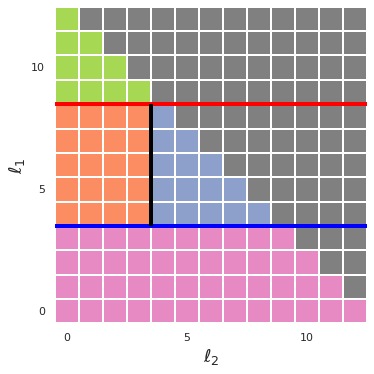

In [19]:
#set general plot parameters
plt.rcParams['font.size'] = 10
bg_color = (1,1,1)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.labelsize'] = 20

#create figure with two subplots
sns.set(rc={'figure.figsize':(6,6)})
fig, ax1 = plt.subplots(nrows = 1,ncols= 1)

#create pandas dataframe
Index= [z1 for z1 in z1s]
Cols = [z2 for z2 in z2s]

#create the colorful data
data = np.zeros((m+1,m+1), dtype = "int32")

for z1 in z1s: 
    for z2 in z2s: 
        if (z1 + z2 <= m): 
            data[z1,z2] = 1
            if z1 > m-T:
                data[z1,z2] = 4
            if z1 < T :
                data[z1,z2] = 3
            if T<= z1 and z1<=m-T:
                if T-Q+1 <= z2 and z1+z2<=m:
                    data[z1,z2] = 2

df = DataFrame(data, index=Index, columns=Cols)

#create colorpallette
cmap = sns.color_palette("Set2",  data.max()-data.min()+1)
cmap[0] = "grey"
#cmap = ListedColormap(["grey", "gold", "wheat","lightblue", "slategrey", "orchid"])
ticks = np.arange(data.min(), data.max()+1,1)


ylabels = np.arange(0,m+1,5)
xlabels = np.arange(0,m+1,5)

dasd = sns.heatmap(df,cmap = cmap,cbar_kws={'label': r'', 'ticks': ticks}, vmin = data.min()-0.5, vmax = data.max()+0.5,cbar = False,
            linewidths = 2, rasterized=True, yticklabels=ylabels, xticklabels = xlabels, ax=ax1)

#rotate the labels on axis
ax1.set_yticks(ylabels+0.5)
ax1.set_xticks(xlabels+0.5)
ax1.set_yticklabels(ylabels, rotation=0)
ax1.set_xticklabels(xlabels, rotation=0)


ax1.hlines(y = m -T +1, xmin = 0, xmax = m+1, color = "red", linewidth  = 4)
ax1.hlines(y = T, xmin = 0, xmax = m+1, color = "blue", linewidth = 4)    
ax1.vlines(x = T, ymin =T, ymax =m-T+1, color = "black", linewidth = 4)    

#add axis labels
ax1.set_xlabel(r"$\ell_2$", fontsize = 18)
ax1.set_ylabel(r"$\ell_1$", fontsize = 18)

ax1.invert_yaxis()

plt.tight_layout(pad=3.0)
plt.savefig("../figures/r0faulty_upperbound_formula_v4.pdf", bbox_inches='tight', format = "pdf", dpi = 1500)